In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras.layers.recurrent import LSTM
#import packages

In [113]:
#set LSTM、GRU time window
window=1
#get data
df1=pd.read_csv('data.csv') 
df1=df1.iloc[:,2:]
df1.tail()

,open,low,close,high
26272,7.1042,7.1042,7.1048,7.1055
26273,7.1047,7.1038,7.1038,7.1047
26274,7.1039,7.1039,7.1046,7.1047
26275,7.1048,7.1043,7.1045,7.1049
26276,7.1049,7.1049,7.1057,7.1057


In [114]:
#MinMaxScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
input_size=len(df.iloc[1,:])

In [115]:
stock=df
seq_len=4
amount_of_features = len(stock.columns)#column
data = stock.to_numpy() #pd.DataFrame(stock) transform to matrix
sequence_length = seq_len + 1#len4+1
result = []
for index in range(len(data) - sequence_length):#recursive -5 times
    result.append(data[index: index + sequence_length])#from i to i+5
result = np.array(result)#get161sample，6*3
row = round(0.9 * result.shape[0])#set train set
train = result[:int(row), :]
## reshape input to be [samples, time steps, features] which is required for LSTM
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]
#reshape 5*3
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

In [116]:
#get GRU
d = 0.01
model = Sequential()
model.add(layers.LSTM(8, input_shape=(4, input_size), return_sequences=False))
model.add(Dropout(d))
model.add(Dense(4))        
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 10, batch_size = 1) #train 1000

Epoch 1/10
23648/23648 [==============================] - 18s 714us/step - loss: 4.1044e-04 - accuracy: 8.4574e-05
Epoch 2/10
23648/23648 [==============================] - 16s 690us/step - loss: 1.5254e-04 - accuracy: 8.4574e-05
Epoch 3/10
23648/23648 [==============================] - 17s 705us/step - loss: 1.4979e-04 - accuracy: 8.4574e-05
Epoch 4/10
23648/23648 [==============================] - 17s 703us/step - loss: 1.3894e-04 - accuracy: 8.4574e-05
Epoch 5/10
23648/23648 [==============================] - 16s 689us/step - loss: 1.3973e-04 - accuracy: 8.4574e-05
Epoch 6/10
23648/23648 [==============================] - 16s 687us/step - loss: 1.4548e-04 - accuracy: 8.4574e-05
Epoch 7/10
23648/23648 [==============================] - 16s 688us/step - loss: 1.3366e-04 - accuracy: 8.4574e-05
Epoch 8/10
23648/23648 [==============================] - 17s 703us/step - loss: 1.3705e-04 - accuracy: 8.4574e-05
Epoch 9/10
23648/23648 [==============================] - 17s 707us/step - loss:

In [117]:
#show the fit outcome
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]

739/739 [==============================] - 1s 456us/step


Text(0.5, 1.0, 'Train Data')

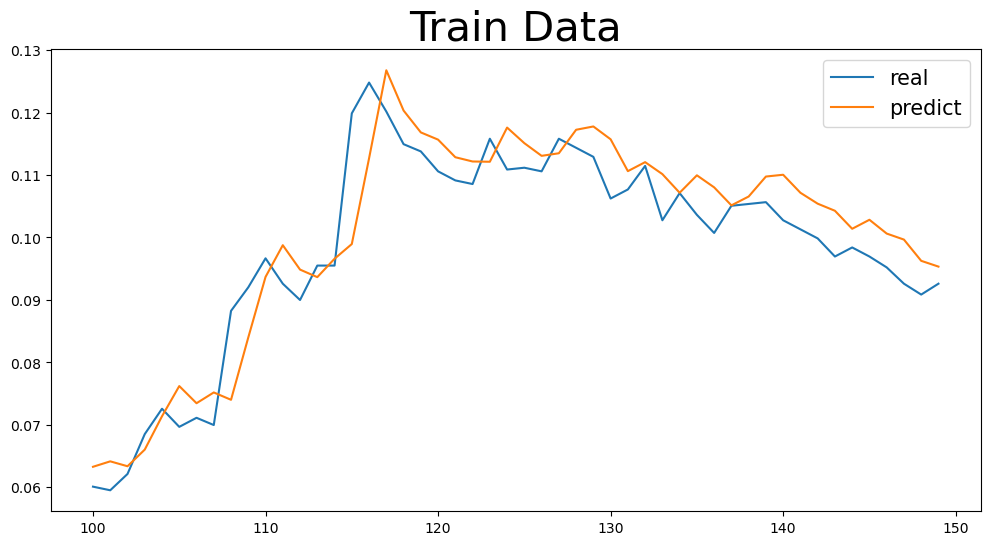

In [150]:
plt.rcParams['figure.figsize']=16,8
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') 
#show the train data

In [119]:
#test on test data
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]

83/83 [==============================] - 0s 513us/step


Text(0.5, 1.0, 'Test Data')

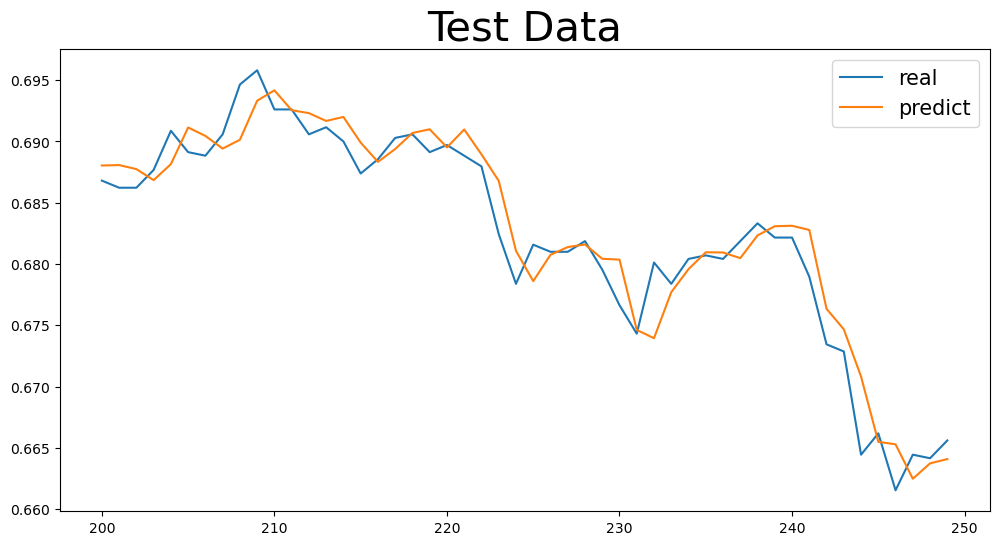

In [149]:
plt.rcParams['figure.figsize']=16,8
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[200:250,0].plot(figsize=(12,6))
draw.iloc[200:250,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') 
#show the test data

In [121]:
#show the outcome
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('train set MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('test set MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('accuracy:',result)
print('train time:',54.56)

train set MAE/MSE/MAPE
0.0029797841089687313
2.6603637225497838e-05
1.0556845787499456
test set MAE/MSE/MAPE
0.002355884565188878
1.7169048481157627e-05
0.330892471545489
accuracy: 0.4885757806549886
train time: 54.56


In [122]:
y_test

array([0.67982583, 0.68098694, 0.6777939 , ..., 0.76661829, 0.76661829,
       0.76719884])

In [123]:
a = pd.DataFrame(y_test)

In [124]:
a['predict'] = pd.DataFrame(y_test_predict)

In [125]:
a

,0,predict
0,0.679826,0.678226
1,0.680987,0.679774
2,0.677794,0.680926
3,0.682148,0.678588
4,0.689115,0.682096
5,0.689405,0.686742
6,0.683890,0.688607
7,0.687663,0.684730
8,0.687663,0.687087
9,0.684761,0.689194


In [126]:
a.columns=['test','predict']
a

,test,predict
0,0.679826,0.678226
1,0.680987,0.679774
2,0.677794,0.680926
3,0.682148,0.678588
4,0.689115,0.682096
5,0.689405,0.686742
6,0.683890,0.688607
7,0.687663,0.684730
8,0.687663,0.687087
9,0.684761,0.689194


In [127]:
a['signal']=np.where(a['predict']< a['test'],1,0)
a['signal']=np.where(a['predict']> a['test'],-1,a['signal'])


In [128]:
a['return']=np.log(a['test']).diff().dropna()
a['system_return']=a['signal']*a['return']
a['entry']=a['signal'].diff()


In [129]:
pd.options.display.max_rows=None
a


,test,predict,signal,return,system_return,entry
0,0.679826,0.678226,1,NaN,NaN,NaN
1,0.680987,0.679774,1,0.001706,0.001706,0.0
2,0.677794,0.680926,-1,-0.004700,0.004700,-2.0
3,0.682148,0.678588,1,0.006403,0.006403,2.0
4,0.689115,0.682096,1,0.010161,0.010161,0.0
5,0.689405,0.686742,1,0.000421,0.000421,0.0
6,0.683890,0.688607,-1,-0.008032,0.008032,-2.0
7,0.687663,0.684730,1,0.005503,0.005503,2.0
8,0.687663,0.687087,1,0.000000,0.000000,0.0
9,0.684761,0.689194,-1,-0.004230,0.004230,-2.0


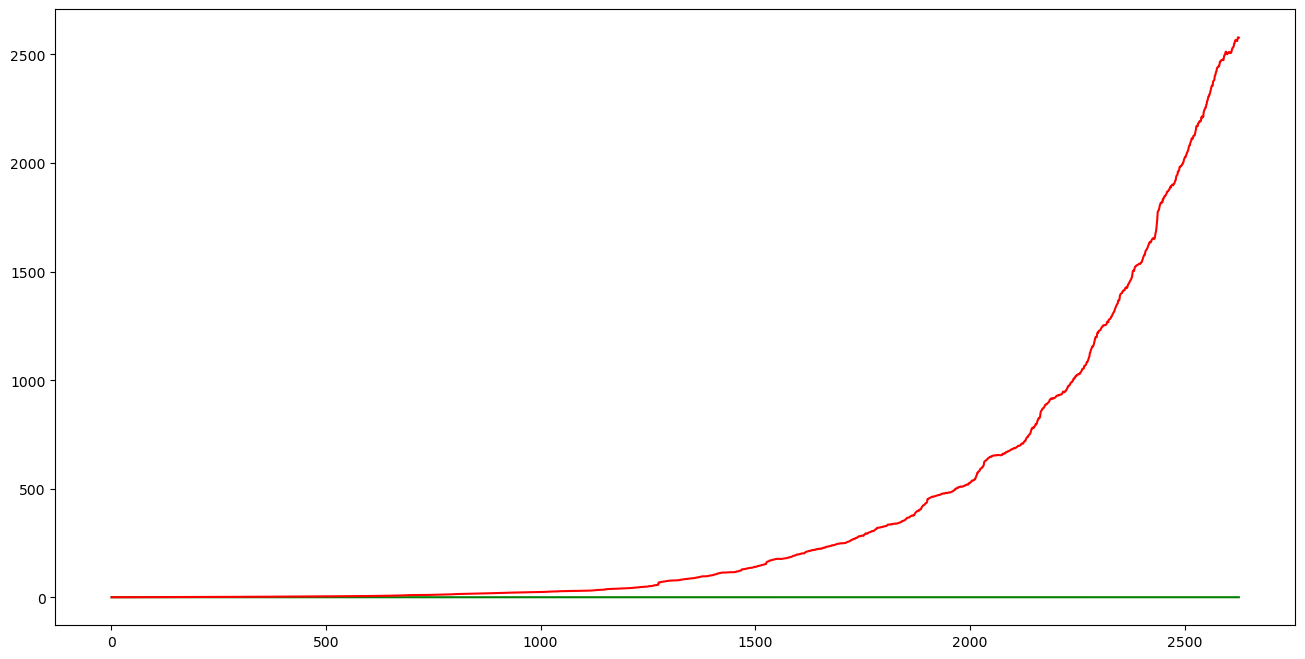

In [146]:
plt.rcParams['figure.figsize']=16,8
plt.plot(np.exp(a['return']).cumprod(),label='Buy/Hold',color='g')
plt.plot(np.exp(a['system_return']).cumprod(),label='system_return',color='r')


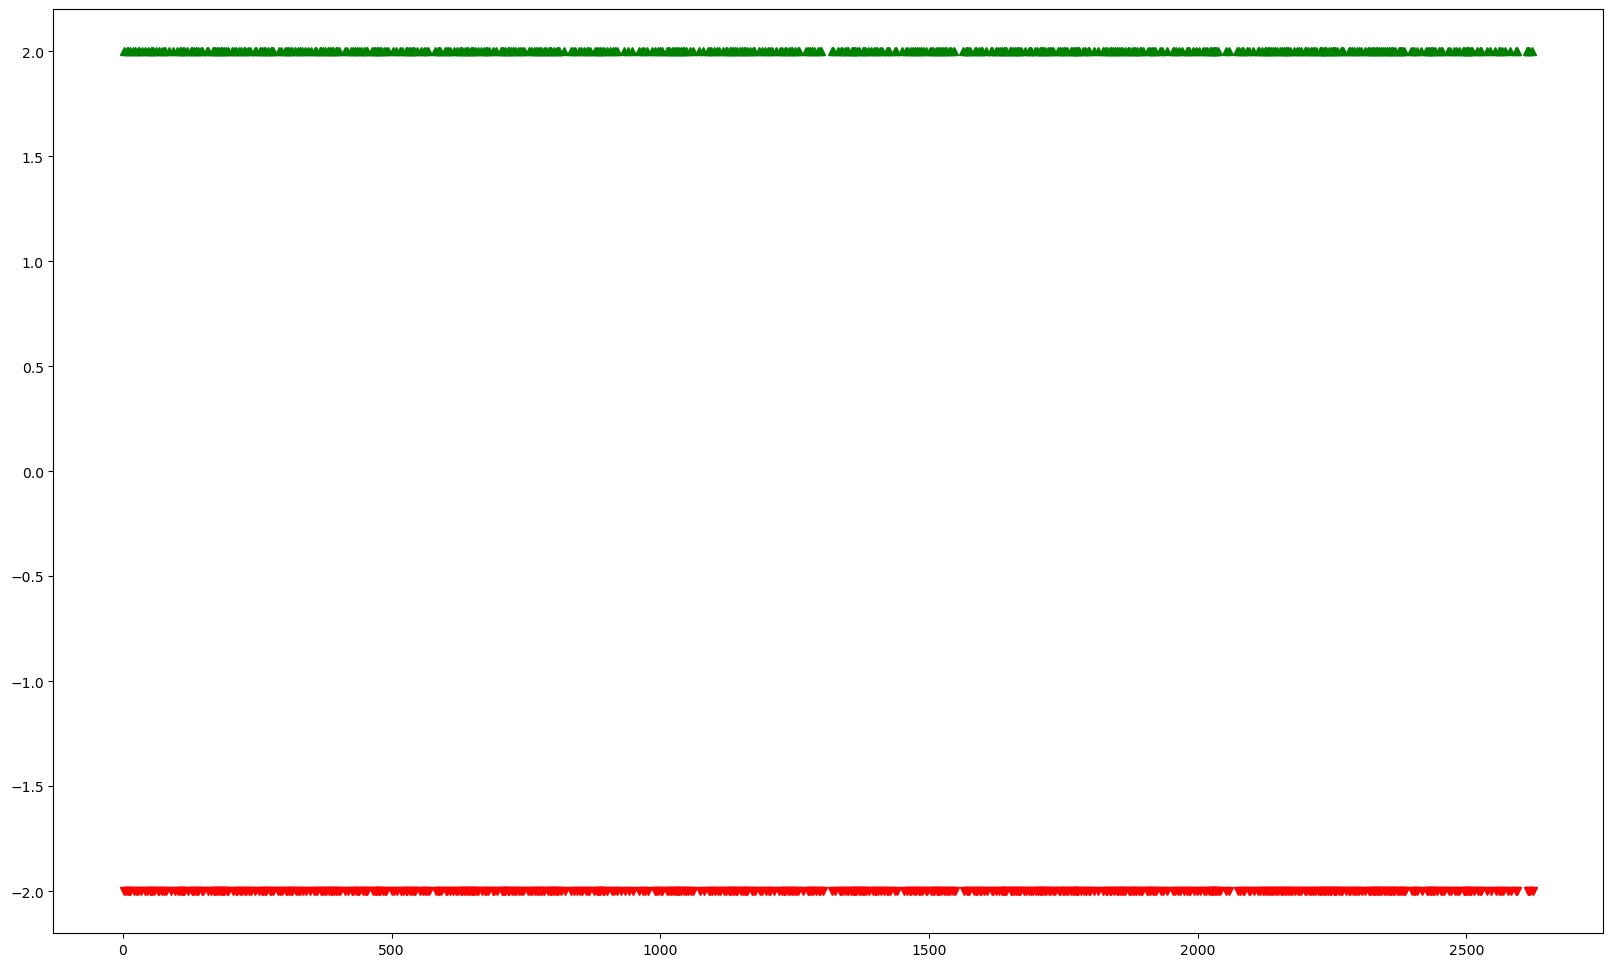

In [148]:
plt.rcParams['figure.figsize']=20,12
plt.plot(a.loc[a.entry==2].index, a['entry'][a.entry==2],'^',color='g')
plt.plot(a.loc[a.entry==-2].index, a['entry'][a.entry==-2],'v',color='r')


In [132]:
print(a.loc[a.entry==2].index)


Int64Index([   3,    7,   10,   13,   19,   23,   28,   30,   36,   42,
            ...
            2563, 2566, 2572, 2581, 2592, 2594, 2612, 2615, 2617, 2623],
           dtype='int64', length=574)


In [133]:
print(a.loc[a.entry==-2].index)

Int64Index([   2,    6,    9,   11,   14,   21,   24,   29,   34,   41,
            ...
            2564, 2569, 2577, 2583, 2593, 2595, 2614, 2616, 2618, 2624],
           dtype='int64', length=575)


In [134]:
def calculate_sharpe(data):
    avg_return=data.mean()
    std_return=data.std()
    sharp= avg_return/std_return
    return sharp


In [135]:
dfbuy=a['return'].dropna()
dfsystem=a['system_return'].dropna()


In [136]:
calculate_sharpe(dfbuy)

0.007721150439567882

In [137]:
calculate_sharpe(dfsystem)

0.5798021224729354

In [138]:
dfbuy=list(dfbuy)
dfsystem=list(dfsystem)

In [139]:
def get_max_drawdown_fast(array):
    drawdowns=[]
    max_so_far=array[0]
    for i in range(len(array)):
        if array[i]> max_so_far:
            drawdown=0
            drawdowns.append(drawdown)
            max_soz_far=array[i]
        else:
            drawdown=max_so_far- array[i]
            drawdowns.append(drawdown)
    return max(drawdowns)
    

In [140]:
get_max_drawdown_fast(dfbuy)

0.06145121240275331

In [141]:
get_max_drawdown_fast(dfsystem)

0.0075419421908195505